# Plot rich club function Implementation

-------------------------------

In [1]:
import scona as scn
import scona.datasets as datasets
import numpy as np
import networkx as nx
import pandas as pd

In [2]:
# Read in sample data from the NSPN WhitakerVertes PNAS 2016 paper.
df, names, covars, centroids = datasets.NSPN_WhitakerVertes_PNAS2016.import_data()

# calculate residuals of the matrix df for the columns of names
df_res = scn.create_residuals_df(df, names, covars)

# create a correlation matrix over the columns of df_res
M = scn.create_corrmat(df_res, method='pearson')

# Initialise a weighted graph G from the correlation matrix M
G = scn.BrainNetwork(network=M, parcellation=names, centroids=centroids)

# threshold
H = G.threshold(10)

In [3]:
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline

GraphBundle

==================================================================================================================

In [4]:
H.node[0]

{'centroids': array([-56.40355 , -40.152663,   1.708876]),
 'name': 'lh_bankssts_part1',
 'x': -56.40355,
 'y': -40.152663,
 'z': 1.708876}

In [5]:
H.report_nodal_measures().head()

,name,centroids,x,y,z
0,lh_bankssts_part1,"[-56.40355, -40.152663, 1.708876]",-56.4036,-40.1527,1.70888
1,lh_bankssts_part2,"[-53.140506, -49.843038, 8.264557]",-53.1405,-49.843,8.26456
2,lh_caudalanteriorcingulate_part1,"[-5.001684, 20.645903, 25.733446]",-5.00168,20.6459,25.7334
3,lh_caudalmiddlefrontal_part1,"[-33.265925, 20.200202, 45.347826]",-33.2659,20.2002,45.3478
4,lh_caudalmiddlefrontal_part2,"[-31.958115, 2.146597, 51.26911]",-31.9581,2.1466,51.2691


In [6]:
bundleGraphs = scn.GraphBundle([H], ["Real_Graph"])

In [7]:
# Note that 10 is not usually a sufficient number of random graphs to do meaningful analysis,
# it is used here for time considerations
bundleGraphs.create_random_graphs("Real_Graph", 5)

        Creating 5 random graphs - may take a little while


In [8]:
bundleGraphs

{'Real_Graph': <scona.classes.BrainNetwork at 0x7fcd043fa9e8>,
 'Real_Graph_R0': <scona.classes.BrainNetwork at 0x7fccd4fc1240>,
 'Real_Graph_R1': <scona.classes.BrainNetwork at 0x7fccd50b1b00>,
 'Real_Graph_R2': <scona.classes.BrainNetwork at 0x7fccd4fcacc0>,
 'Real_Graph_R3': <scona.classes.BrainNetwork at 0x7fccd4fca668>,
 'Real_Graph_R4': <scona.classes.BrainNetwork at 0x7fccd4fcab70>}

In [12]:
# calculate rich club coefficients for each graph

rich_club_df = bundleGraphs.report_rich_club()

In [13]:
rich_club_df

,Real_Graph,Real_Graph_R0,Real_Graph_R1,Real_Graph_R2,Real_Graph_R3,Real_Graph_R4
0,0.100004,0.100004,0.100004,0.100004,0.100004,0.100004
1,0.103228,0.103228,0.103228,0.103228,0.103228,0.103228
2,0.107244,0.107175,0.107175,0.107175,0.107175,0.107175
3,0.112039,0.111920,0.111944,0.111920,0.111920,0.111920
4,0.117842,0.117564,0.117589,0.117564,0.117564,0.117564
5,0.122398,0.121950,0.122003,0.121950,0.121950,0.121950
6,0.127975,0.127254,0.127282,0.127254,0.127282,0.127226
7,0.131899,0.131150,0.131150,0.131121,0.131150,0.131150
8,0.136820,0.135885,0.135915,0.135855,0.135915,0.135885
9,0.141069,0.139940,0.139971,0.139908,0.139940,0.139971


In [11]:
# number of degrees
len(rich_club_df.index)

106

In [14]:
# number of degrees
degree = rich_club_df.index.values

In [17]:
degree

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105])

In [15]:
type(degree)

numpy.ndarray

In [16]:
len(degree)

106

In [19]:
# select the values of the 1st real Graph rich club values
rc_real = np.array(rich_club_df.iloc[:,0])

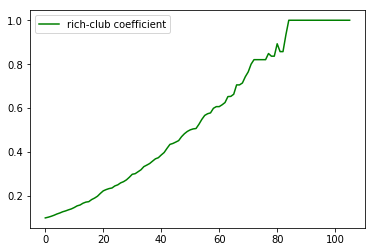

In [42]:
ax = sns.lineplot(x=degree, y=rc_real, label="rich-club coefficient", color="green")

In [25]:
rich_club_df.columns.values

array(['Real_Graph', 'Real_Graph_R0', 'Real_Graph_R1', 'Real_Graph_R2',
       'Real_Graph_R3', 'Real_Graph_R4'], dtype=object)

In [26]:
rich_club_df.columns.tolist()[0]

'Real_Graph'

In [32]:
rand_df = rich_club_df.drop(rich_club_df.columns.tolist()[0], axis=1)

In [34]:
rand_df

,Real_Graph_R0,Real_Graph_R1,Real_Graph_R2,Real_Graph_R3,Real_Graph_R4
0,0.100004,0.100004,0.100004,0.100004,0.100004
1,0.103228,0.103228,0.103228,0.103228,0.103228
2,0.107175,0.107175,0.107175,0.107175,0.107175
3,0.111920,0.111944,0.111920,0.111920,0.111920
4,0.117564,0.117589,0.117564,0.117564,0.117564
5,0.121950,0.122003,0.121950,0.121950,0.121950
6,0.127254,0.127282,0.127254,0.127282,0.127226
7,0.131150,0.131150,0.131121,0.131150,0.131150
8,0.135885,0.135915,0.135855,0.135915,0.135885
9,0.139940,0.139971,0.139908,0.139940,0.139971


In [35]:
rand_df.shape

(106, 5)

In [35]:
# re-organize your dataframe in a suitable way 
# so that there is one column for the x data, one for the y data, and one which holds the label for the data point.

In [36]:
# make 1 column for degrees

degree = rich_club_df.index.values

In [37]:
degree

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105])

In [36]:
# create array to store the degrees
rand_degree = []

# create array to store a rich_club values accordong to the degree
rc_rand = []

for i in range(len(rand_df.columns)):
    rand_degree = np.append(rand_degree, rand_df.index.values)  # numpy array
    rc_rand = np.append(rc_rand, rand_df.iloc[:, i])

In [37]:
len(rand_degree)

530

In [38]:
len(rc_rand)

530

In [39]:
rc_rand

array([0.10000423, 0.1032282 , 0.10717536, 0.11191982, 0.11756392,
       0.12194993, 0.12725406, 0.1311499 , 0.13588514, 0.13993977,
       0.14574415, 0.15264334, 0.15626719, 0.16361849, 0.1684492 ,
       0.17041599, 0.17935748, 0.18579156, 0.19315239, 0.20453108,
       0.21436194, 0.21977011, 0.22331021, 0.22589628, 0.23372737,
       0.23773292, 0.2470884 , 0.2511328 , 0.25859659, 0.26666667,
       0.28047391, 0.28432179, 0.29071366, 0.29748101, 0.30813439,
       0.31377115, 0.32076731, 0.33084391, 0.33777778, 0.34256873,
       0.35093168, 0.36300454, 0.37623457, 0.39263158, 0.39495495,
       0.3999239 , 0.40643863, 0.42115385, 0.43151772, 0.43672316,
       0.44162129, 0.45064935, 0.45252525, 0.46588235, 0.48011101,
       0.48083624, 0.48536585, 0.49230769, 0.5015015 , 0.50420168,
       0.50420168, 0.53763441, 0.53793103, 0.54415954, 0.55      ,
       0.56521739, 0.57142857, 0.57142857, 0.58571429, 0.6374269 ,
       0.62745098, 0.65714286, 0.64102564, 0.64102564, 0.64102

In [40]:
new_rand_df = pd.DataFrame({'Degree':rand_degree, 'Rich Club':rc_rand})

In [92]:
new_rand_df

,Degree,Rich Club
0,0.0,0.100004
1,1.0,0.103228
2,2.0,0.107175
3,3.0,0.111920
4,4.0,0.117564
5,5.0,0.121950
6,6.0,0.127254
7,7.0,0.131150
8,8.0,0.135885
9,9.0,0.139940


In [94]:
# set default colors if None is provided
color = ["#00C9FF", "grey"]

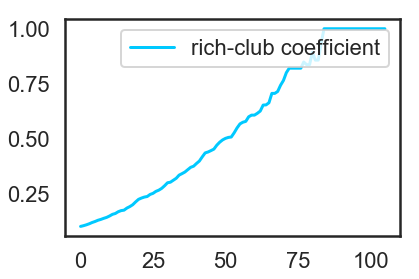

In [95]:
ax = sns.lineplot(x=degree, y=rc_real, label="rich-club coefficient", color=color[0])

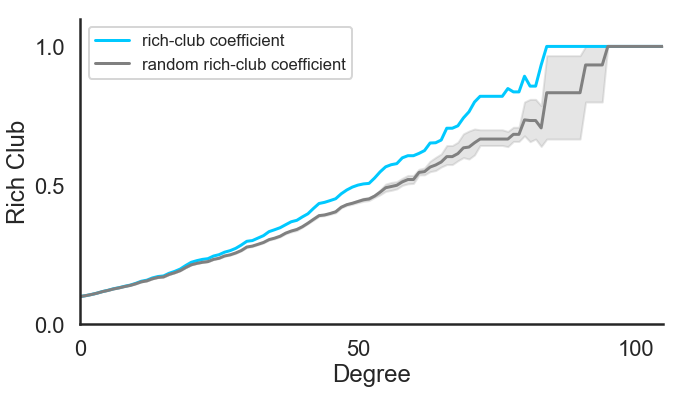

In [96]:

# set the seaborn style and context in the beginning!
sns.set(style="white")
sns.set_context("poster", font_scale=1)

fig, ax = plt.subplots(figsize=(10, 6))

ax = sns.lineplot(x=degree, y=rc_real, label="rich-club coefficient", color=color[0])
ax = sns.lineplot(x="Degree", y="Rich Club", data=new_rand_df, err_style="band", ci=95, color=color[1], label="random rich-club coefficient")


x_max = max(degree)


y_max = max(rc_real) + 0.1   # let y-axis be longer -> looks better

# set the x and y axis limits
ax.set_xlim((0, x_max))
ax.set_ylim((0, y_max))

# set the number of bins to 4
ax.locator_params(nbins=4)

# set the x and y axis labels
ax.set_xlabel("Degree")
ax.set_ylabel("Rich Club")

ax.legend(fontsize="x-small")

# remove the top and right spines from plot
sns.despine()

# adjust subplot params so that the subplot fits in to the figure area
plt.tight_layout()
    

### Test the function implemented in visualisation tools

In [132]:
aaa = scn.GraphBundle([H], ["Real_Graph"])

In [133]:
aaa

{'Real_Graph': <scona.classes.BrainNetwork at 0x7fcd043fa9e8>}

In [137]:
aaa.create_random_graphs("Real_Graph", 1)

        Creating 1 random graphs - may take a little while


In [139]:
import importlib.util
spec = importlib.util.spec_from_file_location("plot_rich_club", "/home/pilot/GSoC/scona/scona/test.py")
foo = importlib.util.module_from_spec(spec)
spec.loader.exec_module(foo)

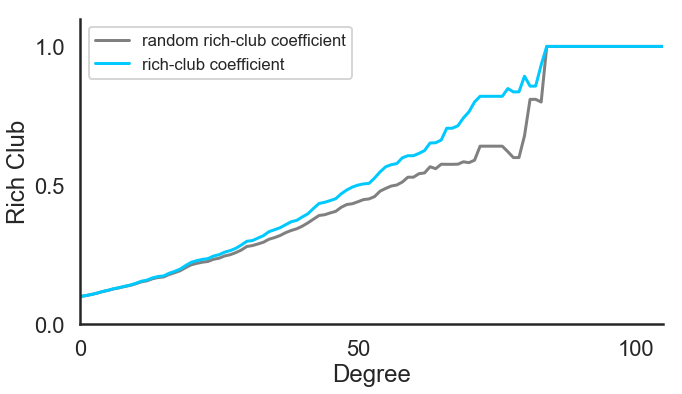

In [140]:
foo.plot_rich_club(aaa)

In [141]:
import importlib.util
spec = importlib.util.spec_from_file_location("plot_rich_club", "/home/pilot/GSoC/scona/scona/visualisations.py")
bar = importlib.util.module_from_spec(spec)
spec.loader.exec_module(bar)

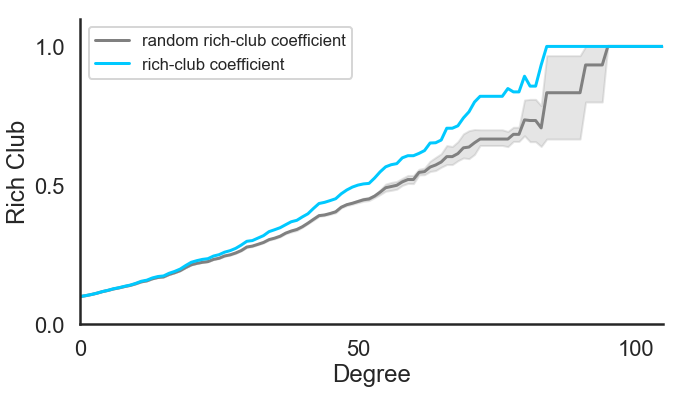

In [143]:
bar.plot_rich_club(bundleGraphs, figure_name="Rich_club_values")

-----------------------------------------------------------------------

### Make an input for the function

Input - nx.rich_club_coefficient(G) ---> graph_measures.rich_club
                - returns: a dictionary mapping integer ``x`` to the rich club coefficient of G for degree ``x``

In [17]:
from scona.graph_measures import rich_club

In [18]:
rich_club_coefficient = rich_club(H)

In [ ]:
# # Calculate n different random graphs and their 
    # rich club coefficients

In [20]:
rich_club_coefficient

{0: 0.1000042302973899,
 1: 0.10322820361506349,
 2: 0.10724360724360725,
 3: 0.11203913614127192,
 4: 0.11784154867368314,
 5: 0.12239789196310935,
 6: 0.12797536481162958,
 7: 0.13189883627145985,
 8: 0.13682019726721564,
 9: 0.14106907585168454,
 10: 0.1473701675792268,
 11: 0.15494805517143567,
 12: 0.1588349657019185,
 13: 0.16688298918387415,
 14: 0.17194570135746606,
 15: 0.17401868375853546,
 16: 0.18359535201640464,
 17: 0.1902830097556264,
 18: 0.19874650367761318,
 19: 0.21160370306480364,
 20: 0.22321260435628648,
 21: 0.2290311986863711,
 22: 0.233578131374949,
 23: 0.23619909502262443,
 24: 0.24562322310339668,
 25: 0.2505434782608696,
 26: 0.25957268537913697,
 27: 0.265074939003137,
 28: 0.27332028701891714,
 29: 0.28520770010131713,
 30: 0.2987012987012987,
 31: 0.30135055783910747,
 32: 0.3102112235970504,
 33: 0.3190723710515794,
 34: 0.3334806955496611,
 35: 0.34031982611395745,
 36: 0.3476230191826522,
 37: 0.35847647498132934,
 38: 0.3690909090909091,
 39: 0.37414

In [19]:
len(rich_club_coefficient)

106

In [ ]:
# Save the degrees as a numpy array
deg = np.array(list(rich_club_coefficient.keys()))

# Save the rich club coefficients as a numpy array
rc = np.array(list(rich_club_coefficient.values()))

# num Rich_Club coefficients
num_rc = len(rc)

n = 10
R_list=None

In [ ]:
rc

In [ ]:
num_rc = len(rc)

In [ ]:
num_rc

In [ ]:
rc_rand = np.ones([len(rc), n])

In [ ]:
rc_rand.shape

In [ ]:
for i in range(n):
        # If you haven't already calculated random graphs
        # or you haven't given this function as many random
        # graphs as it is expecting then calculate a random
        # graph here
        if not R_list or len(R_list) <= i:
            R = random_graph(H)
        # Otherwise just use the one you already made
        else:
            R = R_list[i]
            
        # Calculate the rich club coefficient
        rc_rand_dict = nx.rich_club_coefficient(R, normalized=False)
        
        # And save the values to the numpy array you created earlier
        rc_rand[:, i] = list(rc_rand_dict.values())

In [ ]:
#
#    Create fucking random Graph
#

In [ ]:
def random_graph(G, Q=10):
    
    # Copy the graph
    R = G.copy()
    
    # Calculate the number of edges and set a constant
    # as suggested in the nx documentation
    E = R.number_of_edges()
    
    # Start with assuming that the random graph is not connected
    # (because it might not be after the first permuatation!)
    connected=False
    attempt=0
    
    # Keep making random graphs until they are connected!
    while not connected and attempt < 15:
        # Now swap some edges in order to preserve the degree distribution
        print('Creating random graph - may take a little while!')
        nx.double_edge_swap(R,Q*E,max_tries=Q*E*10)

        # Check that this graph is connected! If not, start again
        connected = nx.is_connected(R)
        if not connected:
            attempt +=1
    
    if attempt == 15:
        print('Giving up - can not randomise graph')
        print('===================================')
        R = G.copy()
        
    return R

In [ ]:
rc_rand.shape

In [ ]:
rc_rand

In [ ]:
rc_rand[0]

In [ ]:
rc_rand[1]

In [ ]:
random_coef = np.mean(rc_rand, axis=1)

In [ ]:
len(random_coef)

In [ ]:
len(rc)

In [ ]:
type(random_coef)

In [ ]:
type(rc)

In [ ]:
random_coef

In [ ]:
rc

### Input data I have, now let's plot some shit

- input - **dictionary**

In [ ]:
def plot_rich_club(rich_club_coef, random_values=False):
    pass

In [ ]:
rc

In [ ]:
random_coef

In [ ]:
deg

In [ ]:
len(deg)

In [ ]:
max(rc)

In [ ]:
# plot the figure
x_max = max(deg)
y_max = max(rc) + 0.2

fig, ax = plt.subplots(figsize=(10, 6))

ax = sns.lineplot(x=deg, y=rc, color="#06209c")
ax = sns.lineplot(x=deg, y=random_coef, color="#c1b8b1")

# Fix the x and y axis limits
ax.set_xlim((0, x_max))
ax.set_ylim((0, y_max))

# Make sure there aren't too many bins!
ax.locator_params(nbins=4)

# Set the x and y axis labels
ax.set_xlabel("Degree")
ax.set_ylabel("Rich Club")

# Despine because we all agree it looks better that way
sns.despine()

plt.tight_layout()

# Save the Figure
# fig.savefig("RuslanAAA", bbox_inches=0, dpi=100)
# plt.close(fig)

In [ ]:
# set seaborn style
sns.set(style="white")
sns.set_context("poster", font_scale=1)

# to diable styles
# sns.reset_orig()

### Test saving to a file

In [ ]:
import importlib.util
spec = importlib.util.spec_from_file_location("plot_rich_club", "/home/pilot/GSoC/scona/scona/visualisations.py")
foo = importlib.util.module_from_spec(spec)
spec.loader.exec_module(foo)

In [ ]:
from scona.graph_measures import rich_club

rich_club_coefficient = rich_club(H)

In [ ]:
# make a random rich_club values produced from the random graph

from scona.make_graphs import random_graph

# create empty numpy array for rich_club values of 10 random graphs 
rc_rand = np.ones([len(rich_club_coefficient), 10])

for i in range(10):
    R = random_graph(H)
    
    # Calculate the rich club coefficient
    rc_rand_dict = rich_club(R)

    # And save the values to the numpy array you created earlier
    rc_rand[:, i] = list(rc_rand_dict.values())

# get the average values of 10 random graph's rich club values
random_coef = np.mean(rc_rand, axis=1)

# make a dict of random rich_club values
for key in list(rc_rand_dict.keys()):
    rc_rand_dict[key] = random_coef[key]

In [ ]:
foo.plot_rich_club(rich_club_coefficient, rc_rand_dict, figure_name = "/home/pilot/GSoC/HAHAHAHH/OAOAOAO/pla.jpg")

-----------------------------------------------------------

----------------------------------------------------